<a href="https://colab.research.google.com/github/NatnaelMengistu1/DS/blob/main/KNN_Regression_(Predicting_Tax).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd # import library to read data into dataframe
#pd.set_option('display.max_columns', None)
import numpy as np # import numpy library
import re # import library for regular expression
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(color_codes=True)

In [2]:
url = '/content/drive/MyDrive/DA/cleandata.csv'
df = pd.read_csv(url)


df.head()

,Unnamed: 0,MLS,sold_price,zipcode,longitude,latitude,lot_acres,taxes,year_built,bedrooms,bathrooms,sqrt_ft,garage,kitchen_features,fireplaces,floor_covering,HOA
0,0,21530491,5300000.0,85637,-110.378200,31.356362,93828240.0,5272.00,1941,13,10.0,10500.0,0.0,"Dishwasher, Freezer, Refrigerator, Oven",6,"Mexican Tile, Wood",0
1,1,21529082,4200000.0,85646,-111.045371,31.594213,74356920.0,10422.36,1997,2,2.0,7300.0,0.0,"Dishwasher, Garbage Disposal",5,"Natural Stone, Other",0
2,2,3054672,4200000.0,85646,-111.040707,31.594844,74356920.0,10482.00,1997,2,3.0,0.0,0.0,"Dishwasher, Garbage Disposal, Refrigerator",5,"Natural Stone, Other: Rock",0
3,3,21919321,4500000.0,85646,-111.035925,31.645878,27733345.2,8418.58,1930,7,5.0,9019.0,4.0,"Dishwasher, Double Sink, Pantry: Butler, Refri...",4,"Ceramic Tile, Laminate, Wood",0
4,4,21306357,3411450.0,85750,-110.813768,32.285162,139827.6,15393.00,1995,4,6.0,6396.0,3.0,"Dishwasher, Garbage Disposal, Refrigerator, Mi...",5,"Carpet, Concrete",55


In [3]:
# In the previous version I converted acres to sqft,renaming it to show what I did
df.rename(columns = {'lot_acres':'lot_sqft'}, inplace = True)
df

,Unnamed: 0,MLS,sold_price,zipcode,longitude,latitude,lot_sqft,taxes,year_built,bedrooms,bathrooms,sqrt_ft,garage,kitchen_features,fireplaces,floor_covering,HOA
0,0,21530491,5300000.0,85637,-110.378200,31.356362,93828240.0,5272.00,1941,13,10.0,10500.0,0.0,"Dishwasher, Freezer, Refrigerator, Oven",6,"Mexican Tile, Wood",0
1,1,21529082,4200000.0,85646,-111.045371,31.594213,74356920.0,10422.36,1997,2,2.0,7300.0,0.0,"Dishwasher, Garbage Disposal",5,"Natural Stone, Other",0
2,2,3054672,4200000.0,85646,-111.040707,31.594844,74356920.0,10482.00,1997,2,3.0,0.0,0.0,"Dishwasher, Garbage Disposal, Refrigerator",5,"Natural Stone, Other: Rock",0
3,3,21919321,4500000.0,85646,-111.035925,31.645878,27733345.2,8418.58,1930,7,5.0,9019.0,4.0,"Dishwasher, Double Sink, Pantry: Butler, Refri...",4,"Ceramic Tile, Laminate, Wood",0
4,4,21306357,3411450.0,85750,-110.813768,32.285162,139827.6,15393.00,1995,4,6.0,6396.0,3.0,"Dishwasher, Garbage Disposal, Refrigerator, Mi...",5,"Carpet, Concrete",55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4985,4995,21810382,495000.0,85641,-110.661829,31.907917,216928.8,2017.00,2005,5,3.0,3601.0,3.0,"Dishwasher, Double Sink, Garbage Disposal, Gas...",1,"Carpet, Ceramic Tile",0
4986,4996,21908591,550000.0,85750,-110.858556,32.316373,61855.2,4822.01,1990,4,3.0,2318.0,3.0,"Dishwasher, Double Sink, Electric Range, Garba...",1,"Carpet, Ceramic Tile",43
4987,4997,21832452,475000.0,85192,-110.755428,32.964708,525333.6,1000.00,1969,3,2.0,1772.0,0.0,"Dishwasher, Electric Range, Island, Refrigerat...",0,Ceramic Tile,0
4988,4998,21900515,550000.0,85745,-111.055528,32.296871,43995.6,5822.93,2009,4,4.0,3724.0,3.0,"Dishwasher, Double Sink, Garbage Disposal, Gas...",1,"Carpet, Ceramic Tile",0


In [4]:
#Age of building is a factor on taxes so we subtract the year_built from 2023

df["Age"] = 2023 - df['year_built']


In [5]:
# Tax Rate is one of the factors that determine the amount of tax one pays 

df["Tax_Rate"] = (df['taxes'] / df['sold_price'])*1000
df

,Unnamed: 0,MLS,sold_price,zipcode,longitude,latitude,lot_sqft,taxes,year_built,bedrooms,bathrooms,sqrt_ft,garage,kitchen_features,fireplaces,floor_covering,HOA,Age,Tax_Rate
0,0,21530491,5300000.0,85637,-110.378200,31.356362,93828240.0,5272.00,1941,13,10.0,10500.0,0.0,"Dishwasher, Freezer, Refrigerator, Oven",6,"Mexican Tile, Wood",0,82,0.994717
1,1,21529082,4200000.0,85646,-111.045371,31.594213,74356920.0,10422.36,1997,2,2.0,7300.0,0.0,"Dishwasher, Garbage Disposal",5,"Natural Stone, Other",0,26,2.481514
2,2,3054672,4200000.0,85646,-111.040707,31.594844,74356920.0,10482.00,1997,2,3.0,0.0,0.0,"Dishwasher, Garbage Disposal, Refrigerator",5,"Natural Stone, Other: Rock",0,26,2.495714
3,3,21919321,4500000.0,85646,-111.035925,31.645878,27733345.2,8418.58,1930,7,5.0,9019.0,4.0,"Dishwasher, Double Sink, Pantry: Butler, Refri...",4,"Ceramic Tile, Laminate, Wood",0,93,1.870796
4,4,21306357,3411450.0,85750,-110.813768,32.285162,139827.6,15393.00,1995,4,6.0,6396.0,3.0,"Dishwasher, Garbage Disposal, Refrigerator, Mi...",5,"Carpet, Concrete",55,28,4.512158
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4985,4995,21810382,495000.0,85641,-110.661829,31.907917,216928.8,2017.00,2005,5,3.0,3601.0,3.0,"Dishwasher, Double Sink, Garbage Disposal, Gas...",1,"Carpet, Ceramic Tile",0,18,4.074747
4986,4996,21908591,550000.0,85750,-110.858556,32.316373,61855.2,4822.01,1990,4,3.0,2318.0,3.0,"Dishwasher, Double Sink, Electric Range, Garba...",1,"Carpet, Ceramic Tile",43,33,8.767291
4987,4997,21832452,475000.0,85192,-110.755428,32.964708,525333.6,1000.00,1969,3,2.0,1772.0,0.0,"Dishwasher, Electric Range, Island, Refrigerat...",0,Ceramic Tile,0,54,2.105263
4988,4998,21900515,550000.0,85745,-111.055528,32.296871,43995.6,5822.93,2009,4,4.0,3724.0,3.0,"Dishwasher, Double Sink, Garbage Disposal, Gas...",1,"Carpet, Ceramic Tile",0,14,10.587145


In [6]:
#Dropping outliers
df = df.drop(index=[715 , 1134, 1587, 2104,2109  ], axis=0)

In [7]:
df

,Unnamed: 0,MLS,sold_price,zipcode,longitude,latitude,lot_sqft,taxes,year_built,bedrooms,bathrooms,sqrt_ft,garage,kitchen_features,fireplaces,floor_covering,HOA,Age,Tax_Rate
0,0,21530491,5300000.0,85637,-110.378200,31.356362,93828240.0,5272.00,1941,13,10.0,10500.0,0.0,"Dishwasher, Freezer, Refrigerator, Oven",6,"Mexican Tile, Wood",0,82,0.994717
1,1,21529082,4200000.0,85646,-111.045371,31.594213,74356920.0,10422.36,1997,2,2.0,7300.0,0.0,"Dishwasher, Garbage Disposal",5,"Natural Stone, Other",0,26,2.481514
2,2,3054672,4200000.0,85646,-111.040707,31.594844,74356920.0,10482.00,1997,2,3.0,0.0,0.0,"Dishwasher, Garbage Disposal, Refrigerator",5,"Natural Stone, Other: Rock",0,26,2.495714
3,3,21919321,4500000.0,85646,-111.035925,31.645878,27733345.2,8418.58,1930,7,5.0,9019.0,4.0,"Dishwasher, Double Sink, Pantry: Butler, Refri...",4,"Ceramic Tile, Laminate, Wood",0,93,1.870796
4,4,21306357,3411450.0,85750,-110.813768,32.285162,139827.6,15393.00,1995,4,6.0,6396.0,3.0,"Dishwasher, Garbage Disposal, Refrigerator, Mi...",5,"Carpet, Concrete",55,28,4.512158
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4985,4995,21810382,495000.0,85641,-110.661829,31.907917,216928.8,2017.00,2005,5,3.0,3601.0,3.0,"Dishwasher, Double Sink, Garbage Disposal, Gas...",1,"Carpet, Ceramic Tile",0,18,4.074747
4986,4996,21908591,550000.0,85750,-110.858556,32.316373,61855.2,4822.01,1990,4,3.0,2318.0,3.0,"Dishwasher, Double Sink, Electric Range, Garba...",1,"Carpet, Ceramic Tile",43,33,8.767291
4987,4997,21832452,475000.0,85192,-110.755428,32.964708,525333.6,1000.00,1969,3,2.0,1772.0,0.0,"Dishwasher, Electric Range, Island, Refrigerat...",0,Ceramic Tile,0,54,2.105263
4988,4998,21900515,550000.0,85745,-111.055528,32.296871,43995.6,5822.93,2009,4,4.0,3724.0,3.0,"Dishwasher, Double Sink, Garbage Disposal, Gas...",1,"Carpet, Ceramic Tile",0,14,10.587145


<Axes: >

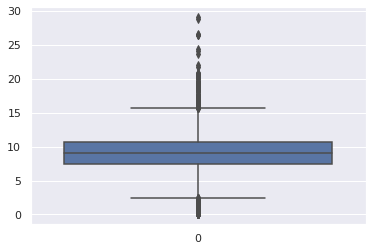

In [8]:
sns.boxplot(data=df['Tax_Rate'])

In [9]:
df['Tax_Rate'].describe()

count    4985.000000
mean        8.956926
std         3.240583
min         0.000000
25%         7.396804
50%         9.109524
75%        10.696089
max        29.173184
Name: Tax_Rate, dtype: float64

In [10]:
df['Tax_Rate'].shape

(4985,)

In [11]:
aux=[]
for i in df['Tax_Rate']:  
  if i >= 0 and i <= 6:
    aux.append(1)
  elif i > 6 and i <= 12:
    aux.append(2)
  elif i > 12 and i <= 18:
    aux.append(3)
  elif i > 18 and i <= 24:
    aux.append(4)
  elif i > 24:
    aux.append(5)
 


In [12]:
len(aux)

4985

In [13]:
#create NumPy array for 'Tax_Grp'
Tax_Grp = np.array(aux)

In [14]:
#add 'Tax_Grp' array as new column in DataFrame
df['Tax_Grp'] = Tax_Grp.tolist()

In [15]:
df

,Unnamed: 0,MLS,sold_price,zipcode,longitude,latitude,lot_sqft,taxes,year_built,bedrooms,bathrooms,sqrt_ft,garage,kitchen_features,fireplaces,floor_covering,HOA,Age,Tax_Rate,Tax_Grp
0,0,21530491,5300000.0,85637,-110.378200,31.356362,93828240.0,5272.00,1941,13,10.0,10500.0,0.0,"Dishwasher, Freezer, Refrigerator, Oven",6,"Mexican Tile, Wood",0,82,0.994717,1
1,1,21529082,4200000.0,85646,-111.045371,31.594213,74356920.0,10422.36,1997,2,2.0,7300.0,0.0,"Dishwasher, Garbage Disposal",5,"Natural Stone, Other",0,26,2.481514,1
2,2,3054672,4200000.0,85646,-111.040707,31.594844,74356920.0,10482.00,1997,2,3.0,0.0,0.0,"Dishwasher, Garbage Disposal, Refrigerator",5,"Natural Stone, Other: Rock",0,26,2.495714,1
3,3,21919321,4500000.0,85646,-111.035925,31.645878,27733345.2,8418.58,1930,7,5.0,9019.0,4.0,"Dishwasher, Double Sink, Pantry: Butler, Refri...",4,"Ceramic Tile, Laminate, Wood",0,93,1.870796,1
4,4,21306357,3411450.0,85750,-110.813768,32.285162,139827.6,15393.00,1995,4,6.0,6396.0,3.0,"Dishwasher, Garbage Disposal, Refrigerator, Mi...",5,"Carpet, Concrete",55,28,4.512158,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4985,4995,21810382,495000.0,85641,-110.661829,31.907917,216928.8,2017.00,2005,5,3.0,3601.0,3.0,"Dishwasher, Double Sink, Garbage Disposal, Gas...",1,"Carpet, Ceramic Tile",0,18,4.074747,1
4986,4996,21908591,550000.0,85750,-110.858556,32.316373,61855.2,4822.01,1990,4,3.0,2318.0,3.0,"Dishwasher, Double Sink, Electric Range, Garba...",1,"Carpet, Ceramic Tile",43,33,8.767291,2
4987,4997,21832452,475000.0,85192,-110.755428,32.964708,525333.6,1000.00,1969,3,2.0,1772.0,0.0,"Dishwasher, Electric Range, Island, Refrigerat...",0,Ceramic Tile,0,54,2.105263,1
4988,4998,21900515,550000.0,85745,-111.055528,32.296871,43995.6,5822.93,2009,4,4.0,3724.0,3.0,"Dishwasher, Double Sink, Garbage Disposal, Gas...",1,"Carpet, Ceramic Tile",0,14,10.587145,2


In [16]:
df['Tax_Grp'].value_counts()
data = df.copy() # For regression


In [17]:
#df['Total_area'] = df['lot_sqft'] + df['sqrt_ft']

<Axes: >

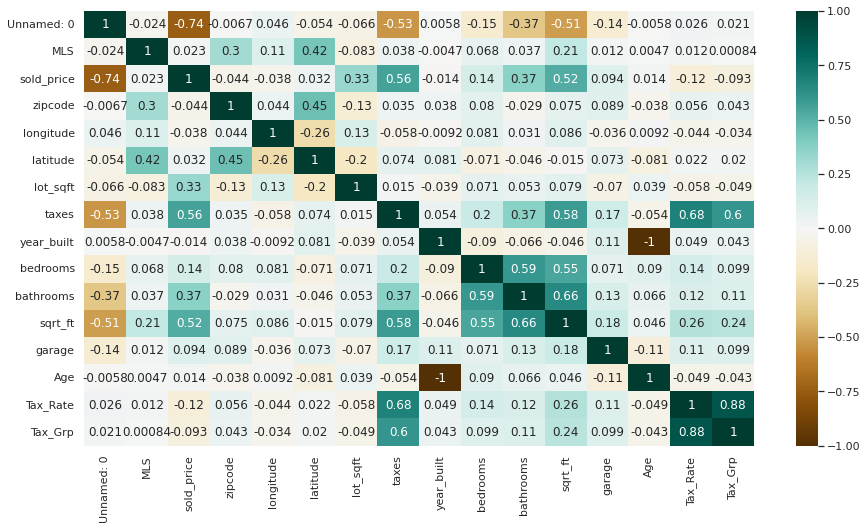

In [18]:
plt.figure(figsize=(15,8))
c = df.corr()
sns.heatmap(c , cmap="BrBG", annot=True)

In [19]:
# Cleaning columns not used for KNN
df.drop(['Unnamed: 0', 'MLS', 'sold_price'	,'zipcode', 'lot_sqft' ,'year_built','kitchen_features', 'fireplaces',	'floor_covering',	'HOA','Age', 'taxes' ], inplace=True, axis=1)


In [20]:
df.dtypes

longitude    float64
latitude     float64
bedrooms       int64
bathrooms    float64
sqrt_ft      float64
garage       float64
Tax_Rate     float64
Tax_Grp        int64
dtype: object

In [21]:
df

,longitude,latitude,bedrooms,bathrooms,sqrt_ft,garage,Tax_Rate,Tax_Grp
0,-110.378200,31.356362,13,10.0,10500.0,0.0,0.994717,1
1,-111.045371,31.594213,2,2.0,7300.0,0.0,2.481514,1
2,-111.040707,31.594844,2,3.0,0.0,0.0,2.495714,1
3,-111.035925,31.645878,7,5.0,9019.0,4.0,1.870796,1
4,-110.813768,32.285162,4,6.0,6396.0,3.0,4.512158,1
...,...,...,...,...,...,...,...,...
4985,-110.661829,31.907917,5,3.0,3601.0,3.0,4.074747,1
4986,-110.858556,32.316373,4,3.0,2318.0,3.0,8.767291,2
4987,-110.755428,32.964708,3,2.0,1772.0,0.0,2.105263,1
4988,-111.055528,32.296871,4,4.0,3724.0,3.0,10.587145,2


In [22]:
df = df[['Tax_Grp', 'longitude',	'latitude','Tax_Rate', 'sqrt_ft', 'bedrooms', 'bathrooms','garage']]
df

,Tax_Grp,longitude,latitude,Tax_Rate,sqrt_ft,bedrooms,bathrooms,garage
0,1,-110.378200,31.356362,0.994717,10500.0,13,10.0,0.0
1,1,-111.045371,31.594213,2.481514,7300.0,2,2.0,0.0
2,1,-111.040707,31.594844,2.495714,0.0,2,3.0,0.0
3,1,-111.035925,31.645878,1.870796,9019.0,7,5.0,4.0
4,1,-110.813768,32.285162,4.512158,6396.0,4,6.0,3.0
...,...,...,...,...,...,...,...,...
4985,1,-110.661829,31.907917,4.074747,3601.0,5,3.0,3.0
4986,2,-110.858556,32.316373,8.767291,2318.0,4,3.0,3.0
4987,1,-110.755428,32.964708,2.105263,1772.0,3,2.0,0.0
4988,2,-111.055528,32.296871,10.587145,3724.0,4,4.0,3.0


In [23]:
# split the data into train and test set

# Shuffle dataframe using sample function
df = df.sample(frac=1)

# Select ratio
ratio = 0.80
 
total_rows = df.shape[0]
train_size = int(total_rows*ratio)
 
# Split data into test and train
train = df[0:train_size]
test = df[train_size:]

In [24]:
train

,Tax_Grp,longitude,latitude,Tax_Rate,sqrt_ft,bedrooms,bathrooms,garage
3098,1,-110.964542,32.235187,4.884375,2585.0,4,3.0,0.0
1932,2,-110.858319,32.325481,6.524559,3837.0,3,4.0,2.0
576,4,-110.883301,32.261060,18.962791,9858.0,7,8.0,4.0
2911,2,-110.974513,31.836495,8.968000,2857.0,3,4.0,3.0
149,2,-110.881172,32.333711,9.979764,7308.0,5,9.0,3.0
...,...,...,...,...,...,...,...,...
2929,2,-110.960215,31.857286,8.830000,0.0,3,3.0,3.0
1622,1,-110.893404,32.329557,2.925546,3176.0,3,3.0,2.0
1882,1,-110.986678,32.219062,4.937390,2100.0,3,2.0,2.0
46,1,-111.096171,32.467398,0.825934,4850.0,3,4.0,3.0


In [25]:
test

,Tax_Grp,longitude,latitude,Tax_Rate,sqrt_ft,bedrooms,bathrooms,garage
345,3,-111.069633,32.457440,12.959408,4491.0,4,5.0,3.0
2919,2,-110.982208,32.317996,9.366708,3847.0,5,3.0,3.5
2197,2,-110.843529,32.293354,9.267471,3291.0,4,3.0,3.0
1629,2,-110.941507,32.297535,6.727525,4496.0,3,4.0,3.0
4656,2,-110.861093,32.534377,6.758929,2670.0,3,4.0,3.0
...,...,...,...,...,...,...,...,...
238,3,-110.994560,32.468790,12.073639,4258.0,4,5.0,3.0
4443,2,-110.950974,32.317155,7.772549,2798.0,4,3.0,3.0
4885,2,-111.077096,32.244746,11.233562,3351.0,3,4.0,3.0
2686,2,-110.860305,32.259171,7.896722,3103.0,3,3.0,2.0


In [26]:
#Changing the train dataframe into a numpy file
train = train.to_numpy()
train

array([[   1.      , -110.964542,   32.235187, ...,    4.      ,
           3.      ,    0.      ],
       [   2.      , -110.858319,   32.325481, ...,    3.      ,
           4.      ,    2.      ],
       [   4.      , -110.883301,   32.26106 , ...,    7.      ,
           8.      ,    4.      ],
       ...,
       [   1.      , -110.986678,   32.219062, ...,    3.      ,
           2.      ,    2.      ],
       [   1.      , -111.096171,   32.467398, ...,    3.      ,
           4.      ,    3.      ],
       [   1.      , -110.997814,   32.430414, ...,    4.      ,
           3.      ,    4.      ]])

In [27]:
#Changing the test dataframe into a numpy file
test = test.to_numpy()
test

array([[   3.      , -111.069633,   32.45744 , ...,    4.      ,
           5.      ,    3.      ],
       [   2.      , -110.982208,   32.317996, ...,    5.      ,
           3.      ,    3.5     ],
       [   2.      , -110.843529,   32.293354, ...,    4.      ,
           3.      ,    3.      ],
       ...,
       [   2.      , -111.077096,   32.244746, ...,    3.      ,
           4.      ,    3.      ],
       [   2.      , -110.860305,   32.259171, ...,    3.      ,
           3.      ,    2.      ],
       [   3.      , -110.976169,   32.426978, ...,    4.      ,
           4.      ,    3.      ]])

## KNN Classifier

In [28]:
class KNNClassifier():

  def fit(self, X, y):
    self.X = X
    self.y = y


  def predict(self, X, K, epsilon = 1e-3):
    N = len(X)
    y_hat = np.zeros(N)

    for i in range(N):
      dist2 = np.sum((self.X-X[i])**2,axis=1)
      idxt  = np.argsort(dist2)[:K]
      gamma_k=1/(np.sqrt(dist2[idxt]+epsilon))
      y_hat[i] = np.bincount(self.y[idxt], weights=gamma_k).argmax()


    return y_hat

In [29]:
def accuracy(y , y_hat):
  return np.mean(y==y_hat)

In [30]:
knn = KNNClassifier()

In [31]:
train[:,1:8]

array([[-110.964542  ,   32.235187  ,    4.884375  , ...,    4.        ,
           3.        ,    0.        ],
       [-110.858319  ,   32.325481  ,    6.52455882, ...,    3.        ,
           4.        ,    2.        ],
       [-110.883301  ,   32.26106   ,   18.9627907 , ...,    7.        ,
           8.        ,    4.        ],
       ...,
       [-110.986678  ,   32.219062  ,    4.93738961, ...,    3.        ,
           2.        ,    2.        ],
       [-111.096171  ,   32.467398  ,    0.82593385, ...,    3.        ,
           4.        ,    3.        ],
       [-110.997814  ,   32.430414  ,    3.00769697, ...,    4.        ,
           3.        ,    4.        ]])

In [32]:
y = train[:,0].astype(int)
set(y)

{1, 2, 3, 4, 5}

In [33]:
X = train[:,1:8]
X.shape

(3988, 7)

In [34]:
knn.fit(X,y)

In [35]:
y_hat = knn.predict(X,3)

In [36]:
accuracy(y,y_hat)

1.0

In [37]:
#Test Data
test.shape

(997, 8)

In [38]:
Y1 = test[:,0]
Y1.dtype

dtype('float64')

In [39]:
X1 = test[:,1:8]
X1
X1.dtype

dtype('float64')

In [48]:
#Test data to predict
y_hat2 = knn.predict(X1,3)

In [49]:
accuracy(Y1,y_hat2)

0.8074222668004012

# Regression

In [50]:
class linearRegression():
  def fit(self, X, y):
    self.w = np.linalg.solve(X,T@X, X.T@y)

  def predict(self, X):
    return np.matmul(X , self.w)

In [51]:
def OLS(Y,Y_hat, N):#Ordinary Least Squares
  return (1/(2*N)*np.sum((Y-Y_hat)**2))

In [52]:
def R2(Y,Y_hat):
  return (1- (np.sum((Y-Y_hat)**2)/np.sum((Y-np.mean(Y))**2)))

In [53]:
class MVlinearRegression():
  def fit(self, X, y , eta =-3 , epochs = 1e3 , show_curve = False):
     #eta - learnig rate #ephoch is number of iteration
     epochs = int(epochs)
     N, D = X.shape #N-ROWS N-COLUMNS
     Y = y
     #Initialize the weights
     self.W = np.random.randn(D)
     J = np.zeros(epochs)
     for epoch in range(epochs):
       Y_hat = self.predict(X)
       J[epoch] = OLS(Y,Y_hat ,N)

       #weight udate rule
       self.W -= eta*(1/N)*(X.T@(Y_hat - Y))
     
     if show_curve:
       plt.figure()
       plt.plot(J)
       plt.xlabel('epochs')
       plt.ylabel("$\mathcal{J}$")
       plt.title("Training curve")
       plt.show()

  def predict(self,X):
    return X @ self.W



In [54]:
myRegression = MVlinearRegression()

In [55]:
data

,Unnamed: 0,MLS,sold_price,zipcode,longitude,latitude,lot_sqft,taxes,year_built,bedrooms,bathrooms,sqrt_ft,garage,kitchen_features,fireplaces,floor_covering,HOA,Age,Tax_Rate,Tax_Grp
0,0,21530491,5300000.0,85637,-110.378200,31.356362,93828240.0,5272.00,1941,13,10.0,10500.0,0.0,"Dishwasher, Freezer, Refrigerator, Oven",6,"Mexican Tile, Wood",0,82,0.994717,1
1,1,21529082,4200000.0,85646,-111.045371,31.594213,74356920.0,10422.36,1997,2,2.0,7300.0,0.0,"Dishwasher, Garbage Disposal",5,"Natural Stone, Other",0,26,2.481514,1
2,2,3054672,4200000.0,85646,-111.040707,31.594844,74356920.0,10482.00,1997,2,3.0,0.0,0.0,"Dishwasher, Garbage Disposal, Refrigerator",5,"Natural Stone, Other: Rock",0,26,2.495714,1
3,3,21919321,4500000.0,85646,-111.035925,31.645878,27733345.2,8418.58,1930,7,5.0,9019.0,4.0,"Dishwasher, Double Sink, Pantry: Butler, Refri...",4,"Ceramic Tile, Laminate, Wood",0,93,1.870796,1
4,4,21306357,3411450.0,85750,-110.813768,32.285162,139827.6,15393.00,1995,4,6.0,6396.0,3.0,"Dishwasher, Garbage Disposal, Refrigerator, Mi...",5,"Carpet, Concrete",55,28,4.512158,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4985,4995,21810382,495000.0,85641,-110.661829,31.907917,216928.8,2017.00,2005,5,3.0,3601.0,3.0,"Dishwasher, Double Sink, Garbage Disposal, Gas...",1,"Carpet, Ceramic Tile",0,18,4.074747,1
4986,4996,21908591,550000.0,85750,-110.858556,32.316373,61855.2,4822.01,1990,4,3.0,2318.0,3.0,"Dishwasher, Double Sink, Electric Range, Garba...",1,"Carpet, Ceramic Tile",43,33,8.767291,2
4987,4997,21832452,475000.0,85192,-110.755428,32.964708,525333.6,1000.00,1969,3,2.0,1772.0,0.0,"Dishwasher, Electric Range, Island, Refrigerat...",0,Ceramic Tile,0,54,2.105263,1
4988,4998,21900515,550000.0,85745,-111.055528,32.296871,43995.6,5822.93,2009,4,4.0,3724.0,3.0,"Dishwasher, Double Sink, Garbage Disposal, Gas...",1,"Carpet, Ceramic Tile",0,14,10.587145,2


In [56]:
data.columns

Index(['Unnamed: 0', 'MLS', 'sold_price', 'zipcode', 'longitude', 'latitude',
       'lot_sqft', 'taxes', 'year_built', 'bedrooms', 'bathrooms', 'sqrt_ft',
       'garage', 'kitchen_features', 'fireplaces', 'floor_covering', 'HOA',
       'Age', 'Tax_Rate', 'Tax_Grp'],
      dtype='object')

In [57]:
X = data[['taxes' , 'Tax_Grp' , 'sqrt_ft', 'Age' ,'bedrooms','bathrooms','garage']].copy()
X

,taxes,Tax_Grp,sqrt_ft,Age,bedrooms,bathrooms,garage
0,5272.00,1,10500.0,82,13,10.0,0.0
1,10422.36,1,7300.0,26,2,2.0,0.0
2,10482.00,1,0.0,26,2,3.0,0.0
3,8418.58,1,9019.0,93,7,5.0,4.0
4,15393.00,1,6396.0,28,4,6.0,3.0
...,...,...,...,...,...,...,...
4985,2017.00,1,3601.0,18,5,3.0,3.0
4986,4822.01,2,2318.0,33,4,3.0,3.0
4987,1000.00,1,1772.0,54,3,2.0,0.0
4988,5822.93,2,3724.0,14,4,4.0,3.0


In [58]:
X = X.to_numpy()

In [59]:
y = X[:,0]
y

array([ 5272.  , 10422.36, 10482.  , ...,  1000.  ,  5822.93,  2814.48])

In [60]:
X = X[:,1:]
X

array([[1.000e+00, 1.050e+04, 8.200e+01, 1.300e+01, 1.000e+01, 0.000e+00],
       [1.000e+00, 7.300e+03, 2.600e+01, 2.000e+00, 2.000e+00, 0.000e+00],
       [1.000e+00, 0.000e+00, 2.600e+01, 2.000e+00, 3.000e+00, 0.000e+00],
       ...,
       [1.000e+00, 1.772e+03, 5.400e+01, 3.000e+00, 2.000e+00, 0.000e+00],
       [2.000e+00, 3.724e+03, 1.400e+01, 4.000e+00, 4.000e+00, 3.000e+00],
       [2.000e+00, 4.317e+03, 3.500e+01, 4.000e+00, 4.000e+00, 0.000e+00]])

In [61]:
#THE FOURTH COLUMN IS IN A DIFFERENT SCALE
X

array([[1.000e+00, 1.050e+04, 8.200e+01, 1.300e+01, 1.000e+01, 0.000e+00],
       [1.000e+00, 7.300e+03, 2.600e+01, 2.000e+00, 2.000e+00, 0.000e+00],
       [1.000e+00, 0.000e+00, 2.600e+01, 2.000e+00, 3.000e+00, 0.000e+00],
       ...,
       [1.000e+00, 1.772e+03, 5.400e+01, 3.000e+00, 2.000e+00, 0.000e+00],
       [2.000e+00, 3.724e+03, 1.400e+01, 4.000e+00, 4.000e+00, 3.000e+00],
       [2.000e+00, 4.317e+03, 3.500e+01, 4.000e+00, 4.000e+00, 0.000e+00]])

In [62]:
y

array([ 5272.  , 10422.36, 10482.  , ...,  1000.  ,  5822.93,  2814.48])

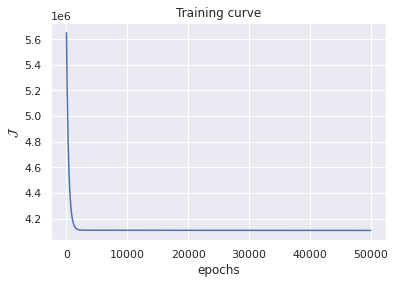

In [63]:
myRegression.fit(X, y , epochs = 5e4 , eta = 1e-10 , show_curve = True)

In [64]:
Xtest = np.array([1	,9019.0	,93	,7	,5.0	,4.0])

In [65]:
myRegression.predict(Xtest)

16661.94014759085

In [66]:
data1 = data[['taxes' , 'Tax_Grp' , 'sqrt_ft', 'Age' ,'bedrooms','bathrooms','garage']].copy()
data1



,taxes,Tax_Grp,sqrt_ft,Age,bedrooms,bathrooms,garage
0,5272.00,1,10500.0,82,13,10.0,0.0
1,10422.36,1,7300.0,26,2,2.0,0.0
2,10482.00,1,0.0,26,2,3.0,0.0
3,8418.58,1,9019.0,93,7,5.0,4.0
4,15393.00,1,6396.0,28,4,6.0,3.0
...,...,...,...,...,...,...,...
4985,2017.00,1,3601.0,18,5,3.0,3.0
4986,4822.01,2,2318.0,33,4,3.0,3.0
4987,1000.00,1,1772.0,54,3,2.0,0.0
4988,5822.93,2,3724.0,14,4,4.0,3.0


In [67]:
# split the data into train and test set

# Shuffle dataframe using sample function
data1 = data1.sample(frac=1)

# Select ratio
ratio = 0.80
 
total_rows = data1.shape[0]
train_size = int(total_rows*ratio)
 
# Split data into test and train
Train = data1[0:train_size]
Test = data1[train_size:]

In [68]:
#Normalization here

In [69]:
Train = Train.to_numpy()

In [70]:
y = Train[:,0]
y

array([ 6073.37,  6252.66,  7434.66, ...,  5088.81, 12819.45,  6364.  ])

In [71]:
X = Train[:,1:]
for i in X[:,1]:
  print(i)

3365.0
4130.0
3479.0
3415.0
4014.0
4817.0
3037.0
2790.0
5505.0
6935.0
5420.0
2721.0
3698.0
3101.0
3222.0
1942.0
3118.0
4065.0
2671.0
3625.0
3014.0
2763.0
3686.0
2447.0
2211.0
3771.0
2478.0
4368.0
3815.0
2833.0
5659.0
3085.0
2806.0
3288.0
5427.0
3360.0
3836.0
4099.0
3360.0
2800.0
3505.0
4518.0
2462.0
3061.0
3002.0
3001.0
6428.0
3682.0
2790.0
5410.0
3735.0
1957.0
4963.0
2835.0
3505.0
3300.0
3044.0
3041.0
3230.0
2285.0
3468.0
4027.0
3772.0
4592.0
3518.0
3631.0
4017.0
2855.0
3930.0
3126.0
4065.0
2668.0
4112.0
2961.0
2779.0
3014.0
3703.0
3052.0
3395.0
0.0
4782.0
2735.0
5852.0
2340.0
3208.0
4544.0
3413.0
3476.0
4314.0
3384.0
3839.0
2680.0
4314.0
4627.0
3238.0
3958.0
4587.0
5492.0
4022.0
3561.0
3438.0
3259.0
1908.0
2541.0
2771.0
2823.0
2808.0
5344.0
5800.0
3009.0
4418.0
4123.0
3508.0
2320.0
3518.0
4178.0
4154.0
3041.0
3653.0
2934.0
3067.0
3698.0
3117.0
3158.0
4237.0
4282.0
4914.0
2530.0
3581.0
3281.0
3847.0
2849.0
4158.0
3541.0
3436.0
2879.0
4066.0
3239.0
2484.0
1867.0
3321.0
3591.0
3927.0
32

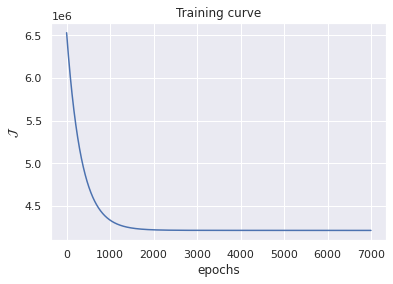

In [72]:
myRegression.fit(X, y , epochs = 7000 , eta = 1e-10 , show_curve = True)

In [73]:
Test

,taxes,Tax_Grp,sqrt_ft,Age,bedrooms,bathrooms,garage
3922,7548.84,3,3831.0,21,4,3.0,3.0
4910,3764.00,2,2892.0,45,3,3.0,2.0
4833,5636.00,2,3052.0,22,4,3.0,3.0
3663,4911.67,2,3043.0,20,3,3.0,3.0
3521,5570.70,2,3261.0,35,5,3.0,2.0
...,...,...,...,...,...,...,...
1388,1045.42,1,3200.0,6,4,4.0,3.0
257,3330.03,1,3339.0,6,3,4.0,3.0
126,18373.00,2,6050.0,15,4,5.0,4.0
3132,4448.94,2,3553.0,17,3,4.0,3.0


In [74]:
Test = Test.to_numpy()

In [75]:
y1 = Test[:,0]

In [76]:
x1 = Test[:,1:]

In [77]:
y_hat3 = myRegression.predict(x1)

In [78]:
N,D = x1.shape
OLS(y1,y_hat3,N)

4109825.4548692983

In [79]:
R2(y1,y_hat3)

0.3615123508550465